In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in Data

data = pd.read_table('TaylorSwiftSongs.csv', delimiter=',')
data = data.drop('Unnamed: 0', axis=1)
data.loc[data['Album']=='The Taylor Swift Holiday Collection','Album'] = 'Holiday Collection'

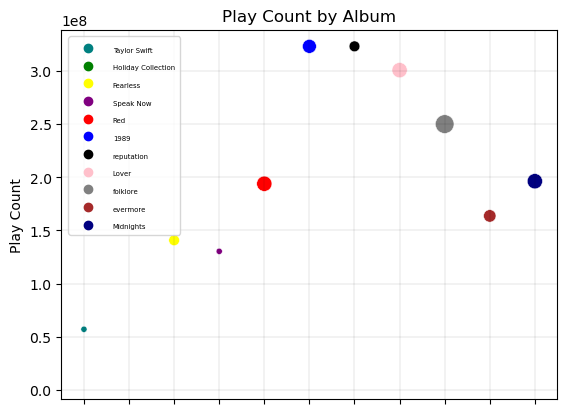

In [3]:
# Play Count by Album

album=(data['Album'].drop_duplicates()[0:11])
album_avg = data.groupby('Album', sort=False)['Play Count'].mean()[0:11]

set_list = data.groupby('Album', sort=False)['Set List'].sum()[0:11]*20

ax = plt.gca()
ax.xaxis.set_tick_params(labelbottom=False)
plot = sns.scatterplot(x=list(album), y=list(album_avg), hue=list(album), palette=['teal','green','yellow','purple','red','blue','black','pink','gray','brown','navy'], s=list(set_list))
plt.xlabel('Album')
plt.ylabel('Play Count')
plt.title('Play Count by Album')
plt.setp(plot.get_legend().get_texts(), fontsize='5')
plot.grid(visible=True, which='major', color='black', linewidth=0.075);
plt.savefig("C:\\Users\\kelse\\Dropbox\\6- Winter 2023\\Stat 386\\my386blog\\assets\\images\\blog3c\\play-by-album.jpg")

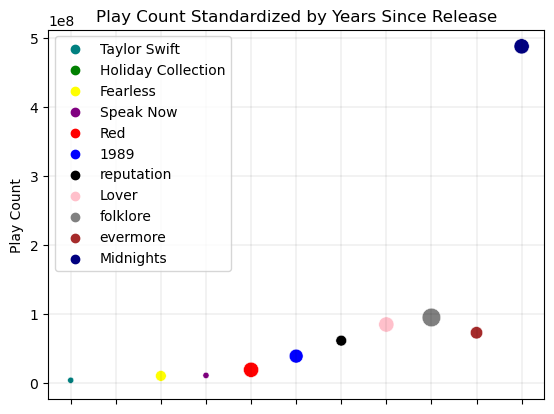

In [4]:
# Play Count by Album by Year

album=(data['Album'].drop_duplicates()[0:11])
album_avg = data.groupby('Album', sort=False)['Play Count'].mean()[0:11]

years = [5988/365,5633/365,5239/365,4526/365,3798/365,3063/365,1936/365,1302/365,966/365,826/365,147/365]
album_avg_1 = album_avg[0:11]
plays = album_avg_1/years
album=(data['Album'].drop_duplicates()[0:11])

set_list = data.groupby('Album', sort=False)['Set List'].sum()[0:11]*20

ax = plt.gca()
ax.xaxis.set_tick_params(labelbottom=False)
plot = sns.scatterplot(x=list(album), y=list(plays), hue=list(album), palette=['teal','green','yellow','purple','red','blue','black','pink','gray','brown','navy'], s=list(set_list))
plt.xlabel('Album')
plt.ylabel('Play Count')
plt.title('Play Count Standardized by Years Since Release')
plot.grid(visible=True, which='major', color='black', linewidth=0.075);
plt.savefig("C:\\Users\\kelse\\Dropbox\\6- Winter 2023\\Stat 386\\my386blog\\assets\\images\\blog3c\\play-by-album-by-year.jpg")

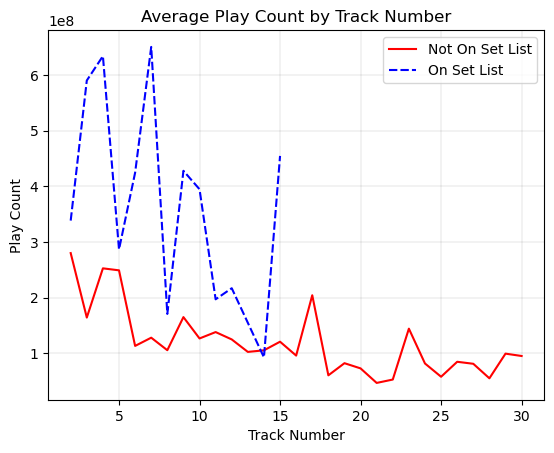

In [5]:
# Play Count by Track Number

track_avg = list(data.groupby('Track Number', sort=True)['Play Count'].mean())
set0 = data[data['Set List']==0].groupby('Track Number', sort=True)['Play Count'].mean()
set1 = data[data['Set List']==1].groupby('Track Number', sort=True)['Play Count'].mean()
df = pd.DataFrame({'avg':track_avg, 'Not On Set List':set0, 'On Set List':set1})
df.index +=1

ax = sns.lineplot(data=df[['Not On Set List','On Set List']], palette=['red','blue'])
plt.xlabel('Track Number')
plt.ylabel('Play Count')
plt.title('Average Play Count by Track Number')
ax.grid(visible=True, which='major', color='black', linewidth=0.075);
plt.savefig("C:\\Users\\kelse\\Dropbox\\6- Winter 2023\\Stat 386\\my386blog\\assets\\images\\blog3c\\play-by-track-and-set.jpg")